In [1]:
import scienceplots
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
from my_plot import set_size,tex_fonts

plt.style.use('science')

reg_size=set_size(390.0)
sub_size=set_size(390,subplots=(2,1))

plt.rcParams.update(tex_fonts)

In [2]:
logs = mr.MesaLogDir('1Mass/LOGS')
history =mr.MesaData('1Mass/LOGS/history.data')

m = 1.0 # Mass in Solar Mass
mu = 16/27
mu_e = 8/7


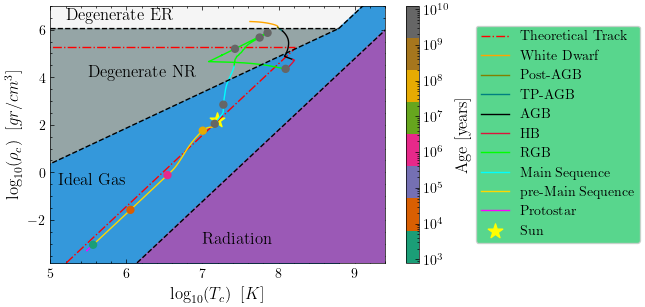

In [3]:
#The T_c-Rho_c plane

rho_sun = 1.622e5 #kg/m^3
rho_sun /= 1e3    #gr/cm^3
rho_sun = np.log10(rho_sun)
T_sun = 1.57e7    #K
T_sun = np.log10(T_sun)

T_core = history.log_center_T
T_core_markers = T_core[::45]

Rho_core = history.log_center_Rho
Rho_core_markers = Rho_core[::45]

age1 = history.star_age
age1_markers = age1[::45]


colarr = ["#9b59b6", "#3498db", "#95a5a6"]

rel_constant = np.log10(9.7e5 * mu_e) # where we go from NR to ER
    
    # Radiation Line T/ρ^1/3 = 3.2 10^7 μ
r_constant = 3.2e7
den_all = np.linspace(-5.5,8,num=200)
min_den = -5.5
rad_temprature = den_all*(1/3) + np.log10(r_constant) - (5/3) * np.log10(mu_e)

fig, ax = plt.subplots(figsize=reg_size)
ax.set_facecolor('whitesmoke')   
ax.plot(rad_temprature, den_all,
            c = 'k', linestyle='dashed',
             zorder=4)
  
ax.fill_between(rad_temprature, min_den, den_all, 
                    color=colarr[0],
                    zorder=2)

    
    # Ideal Line T/ρ^2/3 = 1.21 10^5 μ
ideal_constant = 1.21e5
den_ideal = np.linspace(-4,rel_constant,num=200)
    

ideal_temprature = den_ideal*(2/3) + np.log10(ideal_constant) + np.log10(mu) - (5/3) * np.log10(mu_e)
ax.plot(ideal_temprature, den_ideal,
             c = 'k', linestyle='dashed',
             zorder=3)    
ax.fill_between(ideal_temprature, min_den, den_ideal,
                    color=colarr[1],
                    zorder=1)
    
    # The kink
ideal_constant2 = 1.5e7
den_ideal2 = np.linspace(rel_constant, 8)
fudge = -0.095 # We need to fudge it because it jumps from NR to ER regime
                  # At some point it should be just R
ideal_temprature_2 = den_ideal2*(1/3) + np.log10(ideal_constant2) + np.log10(mu) - (4/3) * np.log10(mu_e) + fudge
ax.plot(ideal_temprature_2, den_ideal2,
             c = 'k', linestyle='dashed', zorder=3)   
ax.fill_between(ideal_temprature_2, min_den, den_ideal2, 
                    color=colarr[1],
                    zorder=1)
    # Rel line
log_temperature = T_core 
temp_test = np.linspace(5, ideal_temprature_2[0], num=len(log_temperature))
rel_density = np.add(np.zeros_like(log_temperature),rel_constant)
ax.plot(temp_test, rel_density,
               c='k', linestyle='dashed',
               zorder=3)
ax.fill_between(temp_test, min_den, rel_density,  
                    color=colarr[2],
                    zorder=0)
    
    # Theoretical evolution line p.115 (8.3)
C = 0.4 # 0.36 - 0.48 p.113
G = 6.6743e-8 # [dyn⋅cm2⋅g−2]
R = 8.31e7 # [ergs mol⁻¹K⁻¹]
M_sol = m * 1.9891e33 # [g]
theory_constant = C*G/R
T_theory = (1/3) * den_all + np.log10(mu * theory_constant) + (2/3) * np.log10(M_sol)
    
if m==1:
    stop_theory = 159
    ax.plot(T_theory[:stop_theory], den_all[:stop_theory], color='red', linestyle='dashdot')
            
    straight = np.add(np.zeros_like(T_theory[:stop_theory]),den_all[stop_theory])
    ax.plot(T_theory[:stop_theory], straight, color='red', linestyle='dashdot',label='Theoretical Track')
if m==2:
    stop_theory = 167
    ax.plot(T_theory[:stop_theory], den_all[:stop_theory], color='red', linestyle='dashdot')       
    straight = np.add(np.zeros_like(T_theory[:stop_theory]),den_all[stop_theory])
    ax.plot(T_theory[:stop_theory], straight, color='red', linestyle='dashdot',label='Theoretical Track')

plt.plot(T_core[76*45-21:],Rho_core[76*45-21:],label='White Dwarf',color='orange')
plt.plot(T_core[72*45:76*45-21+1],Rho_core[72*45:76*45-21+1],label='Post-AGB',color='olive')
plt.plot(T_core[71*45+30:72*45+1],Rho_core[71*45+30:72*45+1],label='TP-AGB',color='teal')
plt.plot(T_core[68*45:71*45+30+1],Rho_core[68*45:71*45+30+1],label='AGB',color='black')
plt.plot(T_core[67*45:68*45+1],Rho_core[67*45:68*45+1],label='HB',color='crimson')
plt.plot(T_core[9*45:67*45+1],Rho_core[9*45:67*45+1],label='RGB',color='lime')
plt.plot(T_core[6*45:9*45+1],Rho_core[6*45:9*45+1],label='Main Sequence',color='cyan')
plt.plot(T_core[2*45:6*45+1],Rho_core[2*45:6*45+1],label='pre-Main Sequence',color='gold')
plt.plot(T_core[:2*45+1],Rho_core[:2*45+1],label='Protostar',color='magenta')

plt.scatter(T_sun,rho_sun,s=120,marker='*',color='yellow',label='Sun',zorder=1)

skip = 7
plot1 = plt.scatter(T_core_markers[2:skip], Rho_core_markers[2:skip], c = age1_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age1_markers[2], vmax=age1_markers[-1]), zorder=3)
plot2 = plt.scatter(T_core_markers[skip::15], Rho_core_markers[skip::15], c = age1_markers[skip::15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age1_markers[2], vmax=age1_markers[-1]), zorder=3)

cbar = plt.colorbar(plot1)#,location='left')
cbar.set_label('Age [years]')

ax.text(5.1,-.5,'Ideal Gas')
ax.text(7.0,-3,'Radiation')
ax.text(5.5,4,'Degenerate NR')
ax.text(5.2,6.4,'Degenerate ER')

legend = plt.legend(bbox_to_anchor=(1.25, .95),frameon=True)
legend.get_frame().set_facecolor('#2ecc71')
ax.set_xlim(5,9.4)
ax.set_ylim(-3.8,7)
plt.xlabel(r'$\log_{10}(T_c) \;\; [K]$')
plt.ylabel(r'$\log_{10}(\rho_c) \;\; [gr/cm^3]$')
plt.savefig(f'plots/loglog_{m}.pdf',bbox_inches = 'tight')
plt.show()




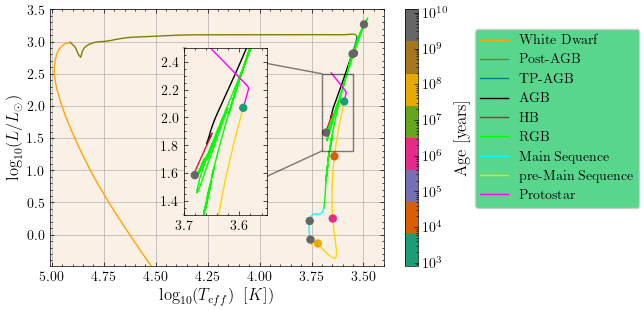

In [4]:
#HR diagram
L = history.log_L[:]
L_markers = L[::45]

T_eff = history.log_Teff[:]
T_eff_markers = T_eff[::45]

age2 = history.star_age[:]
age2_markers = age2[::45]

fig, ax = plt.subplots(figsize=reg_size)
ax.set_facecolor('linen')

skip = 7
plot1 = plt.scatter(T_eff_markers[2:skip], L_markers[2:skip], c = age2_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)
plot2 = plt.scatter(T_eff_markers[skip::15], L_markers[skip::15], c = age2_markers[skip::15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)

cbar = plt.colorbar(plot1)
cbar.set_label('Age [years]')


plt.plot(T_eff[76*45-21:],L[76*45-21:],label='White Dwarf',color='orange')
plt.plot(T_eff[72*45:76*45-21+1],L[72*45:76*45-21+1],label='Post-AGB',color='olive')
plt.plot(T_eff[71*45+30:72*45+1],L[71*45+30:72*45+1],label='TP-AGB',color='teal')
plt.plot(T_eff[68*45:71*45+30+1],L[68*45:71*45+30+1],label='AGB',color='black')
plt.plot(T_eff[67*45:68*45+1],L[67*45:68*45+1],label='HB',color='crimson')
plt.plot(T_eff[9*45:67*45+1],L[9*45:67*45+1],label='RGB',color='lime')
plt.plot(T_eff[6*45:9*45+1],L[6*45:9*45+1],label='Main Sequence',color='cyan')
plt.plot(T_eff[2*45:6*45+1],L[2*45:6*45+1],label='pre-Main Sequence',color='gold')
plt.plot(T_eff[:2*45+1],L[:2*45+1],label='Protostar',color='magenta')

axins = ax.inset_axes([.40, .20, 0.25, .65])
axins.set_facecolor('linen')
axins.plot(T_eff[76*45-21:],L[76*45-21:],label='White Dwarf',color='orange')
axins.plot(T_eff[72*45:76*45-21+1],L[72*45:76*45-21+1],label='Post AGB',color='olive')
axins.plot(T_eff[71*45+30:72*45+1],L[71*45+30:72*45+1],label='TP AGB',color='teal')
axins.plot(T_eff[68*45:71*45+30+1],L[68*45:71*45+30+1],label='AGB',color='black')
axins.plot(T_eff[67*45:68*45+1],L[67*45:68*45+1],label='HB',color='crimson')
axins.plot(T_eff[9*45:67*45+1],L[9*45:67*45+1],label='RGB',color='lime')
axins.plot(T_eff[6*45:9*45+1],L[6*45:9*45+1],label='Main Sequence',color='cyan')
axins.plot(T_eff[2*45:6*45+1],L[2*45:6*45+1],label='pre-Main Sequence',color='gold')
axins.plot(T_eff[:2*45+1],L[:2*45+1],label='Protostar',color='magenta')
axins.scatter(T_eff_markers[2:skip], L_markers[2:skip], c = age2_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)
axins.scatter(T_eff_markers[skip::15], L_markers[skip::15], c = age2_markers[skip::15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)

axins.set_xlim(3.70,3.55)
axins.set_ylim(1.3,2.5)
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlim(5.01,3.4)
ax.set_ylim(-0.49,3.5)

plt.grid()
plt.xlabel(r'$\log_{10}(T_{eff}) \;\; [K])$')
plt.ylabel(r'$\log_{10}(L/L_{\odot})$')

legend = plt.legend(bbox_to_anchor=(1.25, .95),frameon=True)
legend.get_frame().set_facecolor('#2ecc71')
plt.savefig(f'plots/HR_{m}.pdf',bbox_inches = 'tight')
plt.show()


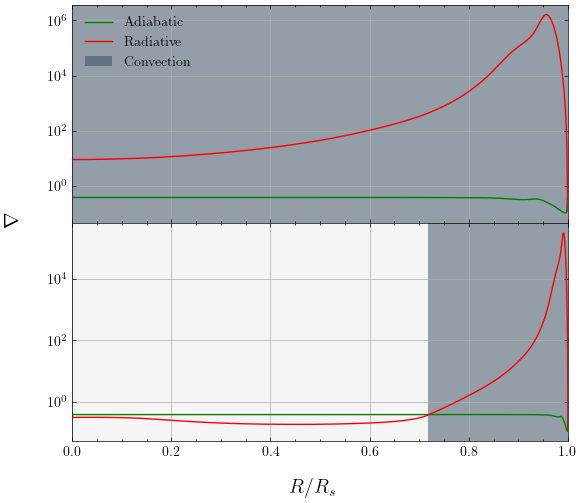

In [5]:
# Pre-main sequence.
PMS = logs.profile_data(profile_number=4)
PMSadiabatic_grad = PMS.grada
PMSlog_ad_grad = np.log10(PMSadiabatic_grad)

PMSradiation_grad = PMS.gradr
PMSlog_rad_grad = np.log10(PMSradiation_grad)

PMSr= PMS.radius
PMSlog_r = np.log10(PMSr)

# Main sequence. 
MS = logs.profile_data(profile_number=8)
MSadiabatic_grad = MS.grada
MSlog_ad_grad = np.log10(MSadiabatic_grad)

MSradiation_grad = MS.gradr
MSlog_rad_grad = np.log10(MSradiation_grad)

MSr= MS.radius
MSlog_r = np.log10(MSr)



fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(sub_size[0]+1,sub_size[1]-1))

    

fig.subplots_adjust(hspace=0)

ax1.set_facecolor('whitesmoke')
ax1.plot(PMSr/PMSr[0], PMSadiabatic_grad,color='green',label='Adiabatic')
ax1.plot(PMSr/PMSr[0], PMSradiation_grad,color='red',label='Radiative')

ax2.set_facecolor('whitesmoke')
ax2.plot(MSr/MSr[0], MSadiabatic_grad,color='green')
ax2.plot(MSr/MSr[0], MSradiation_grad,color='red')

ax1.axvspan(0, 0.99926303, facecolor='#34495e', alpha=0.5,label='Convection')
ax2.axvspan(7.18550154e-01,1, facecolor='#34495e', alpha=0.5,label='Convection')

ax1.grid()
ax2.grid()
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.0,1)
ax1.legend()
fig.supylabel(r'$\nabla$')
fig.supxlabel(r'$R/R_s$')
plt.savefig(f'plots/gradients_{m}.pdf',bbox_inches = 'tight')
plt.show()



In [6]:
PMSr[PMSadiabatic_grad > PMSradiation_grad]/PMSr[0]

array([1.        , 0.99999996, 0.99999986, 0.9999997 , 0.99999949,
       0.99999906, 0.99999799, 0.99999692, 0.9999948 , 0.99999055,
       0.99998528, 0.99998004, 0.99996966, 0.99994926, 0.99990986,
       0.99981847, 0.99977592, 0.99973518, 0.99965846, 0.99958703,
       0.99951999, 0.99948788, 0.99945662, 0.99939642, 0.99933893,
       0.99926303])

In [7]:
MSr[MSadiabatic_grad > MSradiation_grad]/MSr[0]

array([1.00000000e+00, 9.99998568e-01, 9.99995378e-01, 9.99990160e-01,
       9.99983382e-01, 9.99970388e-01, 9.99955067e-01, 9.99940615e-01,
       9.99926894e-01, 9.99913789e-01, 7.18550154e-01, 7.10889975e-01,
       7.05052815e-01, 6.99144441e-01, 6.95170253e-01, 6.87140162e-01,
       6.79016383e-01, 6.74866360e-01, 6.70813230e-01, 6.62535280e-01,
       6.54194702e-01, 6.45800141e-01, 6.41528245e-01, 6.37362170e-01,
       6.28883303e-01, 6.24575090e-01, 6.20375504e-01, 6.11840529e-01,
       6.03286992e-01, 5.99006284e-01, 5.93651681e-01, 5.89366312e-01,
       5.85079952e-01, 5.75431536e-01, 5.69003415e-01, 5.64720723e-01,
       5.56160542e-01, 5.51886563e-01, 5.44415176e-01, 5.36957978e-01,
       5.32704811e-01, 5.24213481e-01, 5.17862855e-01, 5.14126068e-01,
       5.10474634e-01, 5.07821297e-01, 5.05211335e-01, 5.00957794e-01,
       4.96814797e-01, 4.88448218e-01, 4.84278952e-01, 4.80118373e-01,
       4.71821162e-01, 4.64591537e-01, 4.57390132e-01, 4.51240767e-01,
      